In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import load_wine 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score,confusion_matrix,classification_report)

np.random.seed(42)

In [5]:
wine=load_wine()
X=wine.data 
y=wine.target 
print(X.shape)
print(list(wine.target_names))

(178, 13)
['class_0', 'class_1', 'class_2']


In [17]:
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test :", x_test.shape)
print("y_test :", y_test.shape)


x_train: (133, 13)
y_train: (45, 13)
x_test : (133,)
y_test : (45,)


baselinne model 

In [20]:


x_train, x_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # optional (good for classification)
)


In [21]:
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test :", x_test.shape)
print("y_test :", y_test.shape)


x_train: (142, 13)
y_train: (142,)
x_test : (36, 13)
y_test : (36,)


In [26]:

clf = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=7, metric="minkowski", p=2))
])

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)


In [27]:
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [29]:
print("Accuracy:",float(accuracy_score(y_test,y_pred)))
print("confusio0n matrix:",confusion_matrix(y_test,y_pred))
print("classification report :",classification_report(y_test,y_pred))

Accuracy: 1.0
confusio0n matrix: [[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]
classification report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



tuning 

In [31]:
k_values=range(1,42)
accs=[]
for k in k_values:
    model=Pipeline([
        ("scaler",StandardScaler()),
        ("knn",KNeighborsClassifier(n_neighbors=k))
        
    ])
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    accs.append(accuracy_score(y_test,pred))


In [32]:
print(accs)

[0.9722222222222222, 0.9444444444444444, 0.9722222222222222, 0.9444444444444444, 0.9722222222222222, 0.9722222222222222, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9722222222222222, 1.0, 1.0, 1.0, 0.9722222222222222, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9722222222222222, 0.9722222222222222, 0.9722222222222222, 1.0, 0.9722222222222222, 0.9722222222222222, 0.9444444444444444, 0.9722222222222222, 0.9166666666666666, 0.9444444444444444, 0.9166666666666666, 0.9166666666666666, 0.9166666666666666, 0.9166666666666666]


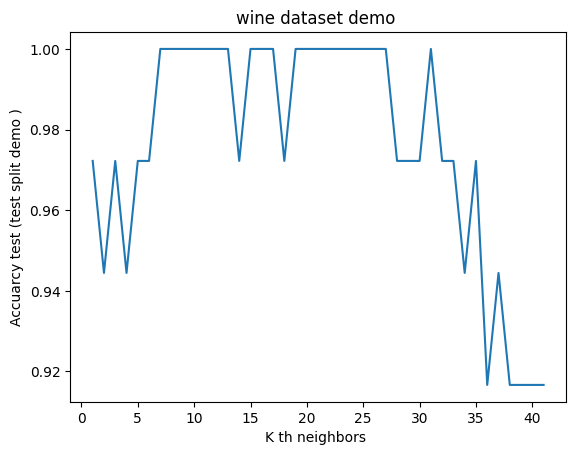

Best K(by this demo 7
Best accuracy: 1.0


In [34]:
plt.figure()
plt.plot(list(k_values),accs)
plt.xlabel("K th neighbors ")
plt.ylabel("Accuarcy test (test split demo )")
plt.title("wine dataset demo ")
plt.show()

best_k=list(k_values)[int(np.argmax(accs))]
print("Best K(by this demo",best_k)
print("Best accuracy:",float(np.max(accs)))